# Image Interpretation – Assignment 2

This assignment on Features covers the labs from the 4th of October. The exer- cises on this sheet are graded by a maximum of 10 points. You will be asked to implement several functions and write a brief report.

In order to submit the results, send this ipynb file which should contain implemented functions and brief reports with all findings to <mikhail.usvyatsov@geod.baug.ethz.ch> with subject
[Image Interpretation 2018 Assignment 2]
no later than on the
10th of October, 2018.

Your functions should work when called by the provided test code (functions prefixed with `test` ) which must not be modified. When run, they should produce a plausible output, no warnings, and no unnecessary output. Eventual example output is given in the ref_-images. The functions that you write take images as arguments, not image filenames (i.e. do not use imread inside the functions). Your functions should not generate figures/plots themselves, the plots are generated by the test functions.

In addition to the functions, include a brief report explaining the structure of the code and the Python functions used. This includes the reasons for choosing particular functions as well as a short justification of their parameter setting. For the more complicated tasks, the choice of the underlying data structures and algorithms should be explained too. We encourage you to add also diagrams, illustrations, and figures into the report when appropriate, but it is not necessary to copy the related theory from the lecture slides. The code should contain comments if appropriate.

Team work is not allowed. Everybody implements his/her own code and writes his/her own report. Discussing issues with others is fine, sharing code and/or report with others is not. If you use any code fragments found on the Internet, make sure you reference them properly.

# Problem 1 2P.

Gaussian smoothing is often needed when extracting multi-scale features. 
* Implement function ii_gaussian that takes two arguments: an image $I$ and the size of the Gaussian kernel $s$ (which is guaranteed to be odd). The function returns the smoothed image of the same size as the input image.
* Explain what should the standard deviation of the Gaussian to fit nicely in the kernel of size s and why.

You can test your function with the help of `test_gaussian`, which produces 4 images, 3 of which are smoothed with Gaussian filters of different sizes.

Helpful Python functions: `sp.signal.convolve2d`

In [2]:
import cv2
import math
import numpy as np
import scipy as sp
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def ii_gaussian(img, size):
    # IMPLEMENT ME: here
    tmp = img.copy()
    # initialize the Gaussian filter
    GauOpt = np.zeros([size,size])
    # get the coordinate in the centre
    midNum = int(size/2)
    # calculate the sigema value
    sigema = (size-1)/6
    
    #calculate each value inside the filter
    for col in range(size):
        for row in range(size):
            correntX = col - midNum
            correntY = row - midNum
            
            # the Gaussian value of each point 
            res1   = 1/(2*math.pi*math.pow(sigema,2))
            res2   = math.exp(-(math.pow(correntX,2)+math.pow(correntY,2))/(2*math.pow(sigema,2)))
            GauOpt[col,row] = res1*res2        
    #normalize
    GauOpt = GauOpt/GauOpt.sum()
    #Perform convolution operations
    tmp = scipy.signal.convolve2d(tmp, GauOpt, boundary='symm', mode='same')
    
    return tmp

In [4]:
def test_gaussian():
    image = cv2.cvtColor(plt.imread('../data/orchard.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original')
    axes[0, 1].imshow(ii_gaussian(image, 5))
    axes[0, 1].set_title('Gaussian-Filtered size=5')
    axes[1, 0].imshow(ii_gaussian(image, 9))
    axes[1, 0].set_title('Gaussian-Filtered size=9')
    axes[1, 1].imshow(ii_gaussian(image, 15))
    axes[1, 1].set_title('Gaussian-Filtered size=15')
    assert np.allclose(image.shape, ii_gaussian(image, 15).shape)

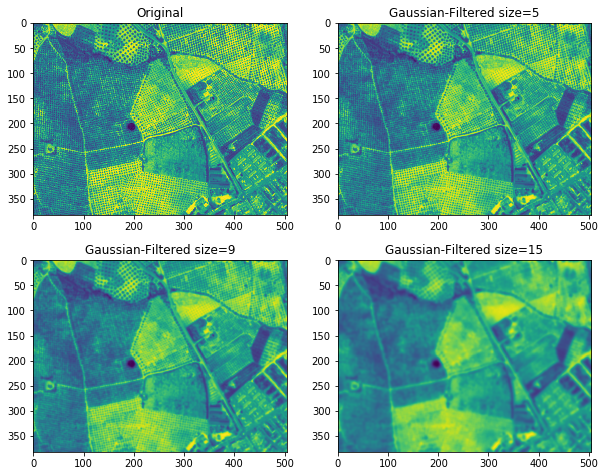

In [5]:
test_gaussian()

## Brief Report:
* Explain what should the standard deviation of the Gaussian to fit nicely in the kernel of size s and why.

In a Gaussian distribution, the probability of a value appearing outside μ±3σ is less than 0.5% (outside μ±2σ is less than 5%). To maximize the impact inside the kernel and minimize the information outside it, the pixel farthest from the center point should satisfy 3σ (or 2σ). That is to say, 0.5 * (kernel_size-1) = 3σ or 0.5 * (kernel_size-1) = 2σ.

The structure of the code: First, the size of the Gaussian filter and the centre point is initialized. Second, the sigma value is calculated. Then, I calculated the value of each position according  to the Gaussian function and normalized them. At last, the convolution operation is performed.

Besides, I noticed that the test function generates fairly "greenish" pictures (same below). Maybe it is because of the different color combination between the library matplotlib and openCV?

# Problem 2. 4P.
Edges inside images contains most of the information of the scenes being captured, that’s why they are one of the most used features when interpreting images.
* Implement function `ii_deriv` that compute the derivative of an image. It that takes 3 arguments: a (grayscale) image $I$, and the orders of derivatives in $x$ and $y$ directions. The returned derivative image has the same size as the input image. The first-order horizontal derivative filter should be a `[-1 0 1]` filter. Similarly, the first order vertical derivative filter corresponds to its transposed version.
* Implement function `ii_sobel` that computes a better derivative operator on an image by first computing the derivative and then applying the gaussian filter of the specified dimention. It that takes 4 arguments: a (grayscale) image $I$, the order of derivative in x and y directions and the amount of gaussian blur. The returned edge image has the same size as the input image.

You can test your function with the help of `test_deriv1`, `test_deriv2`, and `test_sobel` which each produce images using different parameter values. If you wonder how to create the filters, recall that convolution is a commutative and associative operation.

**Check and explain if it is better to apply the gaussian filter on the derivative function to extract edges of an image?**

In [6]:
def ii_deriv(img, order_x, order_y):
    # IMPLEMENT ME: here
    tmp = img.copy()
    # initialize the derivative filter of x and y
    x = np.array([-1,0,1]).reshape(1,3)
    y = np.transpose(x)
    
    #Perform convolution operations
    for i in range(order_x):
        tmp = scipy.signal.convolve2d(tmp, x, boundary='symm', mode='same')
    for i in range(order_y):
        tmp = scipy.signal.convolve2d(tmp, y, boundary='symm', mode='same')
    
    return tmp
    
def ii_sobel(img, order_x, order_y, blur):
    # IMPLEMENT ME: here
    tmp = img.copy()
    
    #Perform derivative convolution
    tmp = ii_deriv(tmp, order_x, order_y)
    #Perform Gaussian blur
    tmp = ii_gaussian(tmp, blur)
    
    return tmp

In [7]:
def test_sobel():
    image = cv2.cvtColor(plt.imread('../data/pepper.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    d = ii_deriv(image, 1, 0)
    axes[0, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 0].set_title('1st x-derivative')
    d = ii_sobel(image,  1, 0, 7)
    axes[0, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 1].set_title('1st x-derivative gauss')
    
    d_x = ii_deriv(image, 1, 0)
    d_y = ii_deriv(image, 0, 1)
    d = np.sqrt(d_x**2 + d_y**2)
    
    axes[1, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 0].set_title('deriv edge strength')
    
    d_x = ii_sobel(image, 1, 0, 7)
    d_y = ii_sobel(image, 0, 1, 7)
    d = np.sqrt(d_x**2 + d_y**2)
    
    axes[1, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 1].set_title('gauss edge strength')

In [8]:
def test_deriv1():
    image = cv2.cvtColor(plt.imread('../data/zebra.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original')
    
    d = ii_deriv(image, 1, 0)
    axes[0, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 1].set_title('1st x-derivative')
    
    d = ii_deriv(image, 2, 0)
    axes[1, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 0].set_title('second order x-derivative')
    
    d = ii_deriv(image, 0, 1)
    
    axes[1, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 1].set_title('first order y-derivative')
    
    assert np.allclose(image.shape, ii_deriv(image, 0, 1).shape)

In [9]:
def test_deriv2():
    image = cv2.cvtColor(plt.imread('../data/zebra.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    d = ii_deriv(image, 2, 0)
    axes[0, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 0].set_title('2nd x-derivative')
    d = ii_deriv(image, 1, 1)
    axes[0, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 1].set_title('xy-derivative gauss')

    d_x = ii_deriv(image, 1, 0)
    d_y = ii_deriv(image, 0, 1)
    d = np.sqrt(d_x**2 + d_y**2)
    
    axes[1, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 0].set_title('edge strength')
    
    h_size = 15
    d_xx = ii_deriv(image, 2, 0)
    d_yy = ii_deriv(image, 0, 2)
    d_xy = ii_deriv(image, 1, 1)
    d = d_xx * d_yy - d_xy**2

    axes[1, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 1].set_title('determinant of hessian')

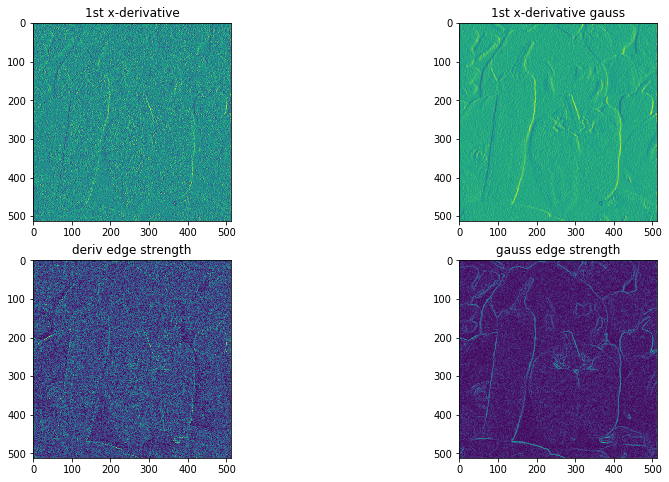

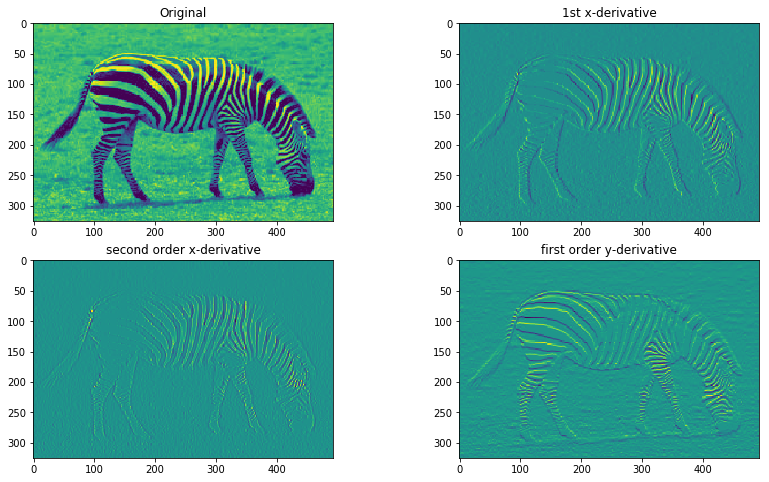

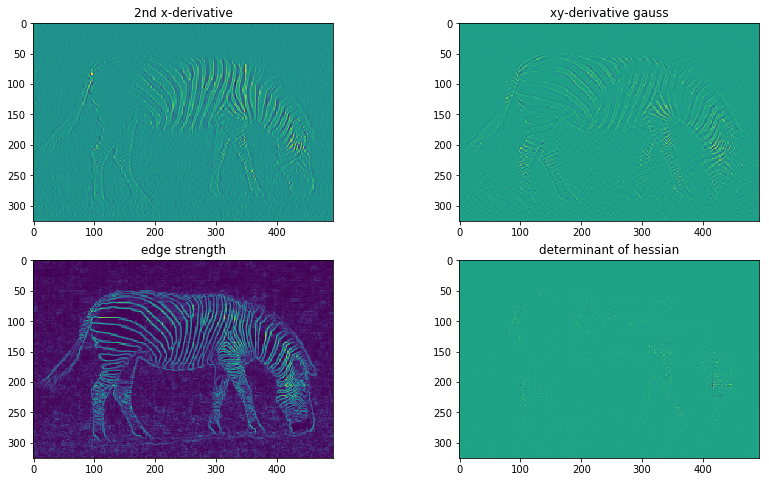

In [10]:
test_sobel()
test_deriv1()
test_deriv2()

## Brief Report:
* Check and explain if it is better to apply the gaussian filter on the derivative function to extract edges of an image?

Yes, the effect of extracting edges is better with the soble filter than merely applying image derivatives. The reason is that when performing image derivatives, besides identifying edges, small "salt and pepper" noise will appear in non-edge areas. Performing the Gaussian filter is like considering the domain and perform smoothing. Therefore, with much of the noise eliminated, the edges of the image is more apparent.


The structure of the ii_deriv function: The first-order horizontal and vertical derivative filters are initialized at first; then I use scipy.signal.convolve2d function to perform the convolution based on the derivative filters. The input parameter determines the numbers of convolution.

The structure of the ii_sobel function: First, I call the ii_deriv function to perform the required horizontal and vertical derivative. Then the ii_gaussian function is called to perform a Gaussian smoothing.

# Problem 3. 2P.
Variance in pixel neighborhood is a feature useful for urban area detection. Implement function `ii_variance` that takes two arguments: a (grayscale) image $I$ and the (odd) size of the window $s$. The returned image has the same size as the input image: For each pixel, the variance in an $s \times s$ neighborhood should be computed. You can use `test_variance` to show an image and the result after filtering. Can you see the urban area? Take special care here not to introduce boundary artifacts: No high variance should be detected at image boundary.

Helpful Python functions: `np.pad`, `scipy.ndimage.generic_filter`

**Can you see the urban area? Why? Is it better to compute the variance on the grayscale image or the color channels separately? 
Show the variance of different channels and motivate your answer.**

In [11]:
def ii_variance(img, size):
    # IMPLEMENT ME: here
    tmp = img.copy()
    
    #initialize the footprint -- the size of the window 
    footprint = np.ones((size,size))
    #define the used function --return the variance of a given array
    def varianceFunc(arr):
        return np.var(arr)
    #calculate
    tmp = scipy.ndimage.generic_filter(tmp,varianceFunc,footprint=footprint, mode = 'nearest')
    
    return tmp

In [12]:
def test_variance():
    image = cv2.cvtColor(plt.imread('../data/sat.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    
    axes[0].imshow(image)
    axes[0].set_title('Original')
    
    d = ii_variance(image, 15)
    axes[1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1].set_title('Variance-Filtered size=15')
    
 
    assert np.allclose(image.shape, ii_variance(image, 15).shape)

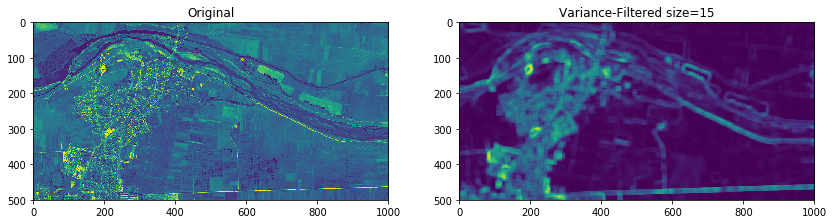

In [13]:
test_variance()

# image = plt.imread('../data/sat.png')
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# dR = ii_variance(image[:,:,0], 15)
# axes[0,0].imshow((dR - dR.min()) / (dR.max() - dR.min()), cmap = plt.cm.gray)
# axes[0,0].set_title('Variance-Filtered 1')


# dG = ii_variance(image[:,:,1], 15)
# axes[0,1].imshow((dG - dG.min()) / (dG.max() - dG.min()), cmap = plt.cm.gray)
# axes[0,1].set_title('Variance-Filtered 2')

# dB = ii_variance(image[:,:,2], 15)
# axes[1,0].imshow((dB - dB.min()) / (dB.max() - dB.min()), cmap = plt.cm.gray)
# axes[1,0].set_title('Variance-Filtered 3')

# n,m = dR.shape
# d=np.zeros([n,m,3])
# d[:,:,0] = dR
# d[:,:,1] = dG
# d[:,:,2] = dB

# axes[1,1].imshow((d - d.min()) / (d.max() - d.min()))
# axes[1,1].set_title('Variance-Filtered ALL')



## Brief Report:
* Can you see the urban area? Why? Is it better to compute the variance on the grayscale image or the color channels separately? 
Show the variance of different channels and motivate your answer.

Yes, the urban area is visible on the variance image. However, I don't see much difference between different computation methods. I think it is because urban areas are different than other objects in the image in both the three image bands. Therefore, we can clearly distinguish the urban areas either computing on the grayscale image or the color images. 

The structure of the ii_variance function: First, the footprint (the size of the window) needs to be initialized according to the given parameter, you can also use "size" to indicate them. Then, we need to define the used function, which is to return the variance of a given array. Together these two is given to the scipy.ndimage.generic_filter function to implement the variance calculation, and the parameter mode = 'nearest' determines how the input array is extended when the filter overlaps a border, "nearest" indicated that the input is extended by replicating the last pixel.


# Problem 4. 2P.
Histograms can be used either as texture features or as robustifiers of more complicated (gradient-based) features. Implement function `ii_hist` that takes two arguments: a (grayscale) image $I$ and the number of levels $n$. The function then returns image histogram with $n$ bins that are evenly spaced over the whole theoretical value range (use e.g. `im2double` to get a standardized range of `[0 1]`). Test
your function on input (0:1/255:1,4). Did it correctly output `[64 64 64 64]`? You can use `test_hist` to perform additional testing.

Helpful Python functions: `np.linalg.linspace`, `np.digitize` (do not use `np.histogram*`, `plt.hist`)

In [14]:
def ii_hist(image, N):
    # IMPLEMENT ME: here
    hist = None
    #find the max and min value of the image
    maxVal = np.max(image)
    minVal = np.min(image)
    #split the array according to the given N
    splitArr = np.linspace(minVal,maxVal,N+1)
    #generate the flag matrix
    indMat = np.digitize(image,splitArr,right=False)
    
    hist = np.zeros(N)
    #count the numbers 
    for i in range(N):
        hist[i]=np.sum(indMat == i+1)
        
    #considering the last value
    hist[N-1] = hist[N-1] + np.sum(indMat == N+1)

    return hist

In [15]:
def test_hist():
    image = plt.imread('../data/zebra.png')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    patch_1 = image[59:158, 119:218]
    patch_2 = image[184:283, 193:293]
    
    axes[0, 0].imshow(patch_1)
    axes[0, 0].set_title('Patch 1')
   
    hist_1 = ii_hist(patch_1, 16)
    axes[0, 1].bar(np.arange(len(hist_1)),hist_1)
    axes[0, 1].set_title('Histogram patch 1')
    
    axes[1, 0].imshow(patch_2)
    axes[1, 0].set_title('Patch 2')
   
    hist_2 = ii_hist(patch_2, 16)
    axes[1, 1].bar(np.arange(len(hist_2)), hist_2)
    axes[1, 1].set_title('Histogram patch 2')
    
    assert hist_1.shape[0] == 16

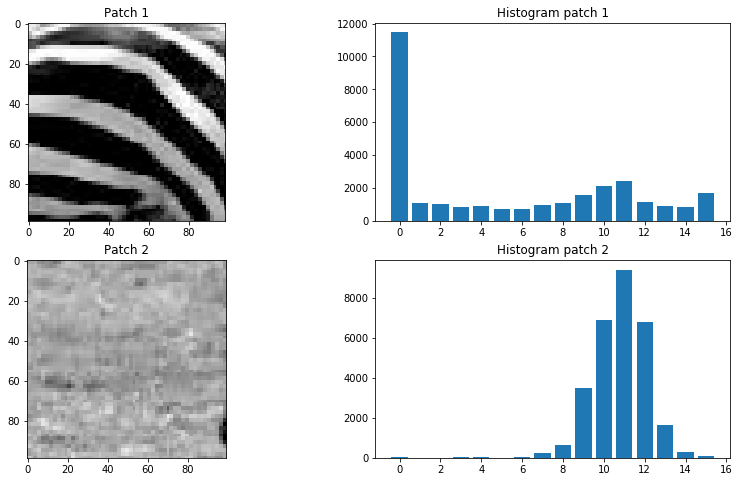

In [16]:
test_hist()

## Brief Report:

The structure of the ii_hist function: First, we need to find the min and max value of the input image. Based on this, we can create a segment array with np.linspace function. Then, by using the np.digitize function, we can get the segment number of each pixel. The last step is to add up the total number of each segment. Remember to consider the last value, which is not considered in the function np.digitize.

